In [82]:
import scipy as sp
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import numpy as np
import string


In [83]:
data = pd.read_csv('anime.csv')
data = data[['title', 'score', 'scored_by', 'episodes', 'start_date', 'end_date',
             'members', 'start_year', 'favorites', 'genres', 'themes', 'synopsis']]
data = data[data['start_year'] >= 1980]
data

,title,score,scored_by,episodes,start_date,end_date,members,start_year,favorites,genres,themes,synopsis
0,Fullmetal Alchemist: Brotherhood,9.13,1871705,64.0,2009-04-05,2010-07-04,2932347,2009.0,204645,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],After a horrific alchemy experiment goes wrong...
1,Hunter x Hunter (2011),9.04,1509622,148.0,2011-10-02,2014-09-24,2418883,2011.0,185178,"['Action', 'Adventure', 'Fantasy']",[],Hunters devote themselves to accomplishing haz...
2,Shingeki no Kyojin Season 3 Part 2,9.07,1329500,10.0,2019-04-29,2019-07-01,1881734,2019.0,51931,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Seeking to restore humanity's diminishing hope...
3,Steins;Gate,9.08,1252286,24.0,2011-04-06,2011-09-14,2269121,2011.0,173088,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",Eccentric scientist Rintarou Okabe has a never...
4,Koe no Katachi,8.95,1398608,1.0,2016-09-17,2016-09-17,2001335,2016.0,77431,['Drama'],['Romantic Subtext'],"As a wild youth, elementary school student Sho..."
...,...,...,...,...,...,...,...,...,...,...,...,...
20749,Jibian Ying Meng,NaN,1,40.0,2015-10-09,NaN,15,2015.0,0,"['Action', 'Sci-Fi']",['Mecha'],NaN
20751,Yi Xue,NaN,2,57.0,2016-01-05,2016-11-02,15,2016.0,0,['Comedy'],[],NaN
20754,AOKI & Taka no Tsume,NaN,5,7.0,2014-10-22,2015-02-26,15,2014.0,0,['Comedy'],[],A collaboration between Taka no Tsume and AOKI...
20756,Madtoy Chatty,NaN,1,NaN,2022-04-20,NaN,14,2022.0,0,['Comedy'],[],NaN


In [84]:
import plotly.express as px

# Visualizing the top-rated anime based on the year it was released using a line chart
filtered_df = data[['title', 'start_year', 'score']].dropna()
filtered_df['start_year'] = filtered_df['start_year'].astype(int)
data_by_year = filtered_df.groupby('start_year')['score'].max()
highest_rated_anime = filtered_df.loc[filtered_df.groupby('start_year')['score'].idxmax(), ['title', 'start_year', 'score']]

fig = px.line(highest_rated_anime, x='start_year', y='score', labels={'start_year': 'Start Year', 'score': 'Score'},
              title='Highest Rating Anime from Different Start Years')
fig.update_layout(xaxis_tickangle=-40, xaxis_tickfont=dict(size=8))
fig.show()



In [85]:
import plotly.subplots as sp
import plotly.graph_objs as go 
# Visualizing the distribution of ratings comparing loyal fanbases to unloyal - measured by finding the ratio between members
# that have scored the anime and overall number of members.
filtered_data = data[['start_year', 'title', 'score', 'members', 'scored_by']].dropna()
filtered_data = filtered_data.assign(scored_mem_ratio = filtered_data.scored_by/filtered_data.members)
filtered_data['score'] = filtered_data['score'].astype(int)
above_50 = filtered_data[filtered_data['scored_mem_ratio'] >= 0.5]
under_50 = filtered_data[filtered_data['scored_mem_ratio'] < 0.5]

# fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
# fig.suptitle('Rating Distributions: Over 50% of the Member-Base Voting vs. Under 50%')

# sns.countplot(ax=axes[0], x='score', data = above_50)
# axes[0].set_title('Over 50%')
# axes[0].set_xlabel('Score')
# axes[0].set_ylabel('Rated Count')

# sns.countplot(ax=axes[1], x='score', data = under_50)
# axes[1].set_title('Under 50%')
# axes[1].set_xlabel('Score')
# axes[1].set_ylabel('Rated Count')

# plt.show()

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Over 50%', 'Under 50%'))

fig.add_trace(go.Histogram(x=above_50['score'], name='Over 50%'), row=1, col=1)
fig.add_trace(go.Histogram(x=under_50['score'], name='Under 50%'), row=1, col=2)

fig.update_layout(title='Rating Distributions: Over 50% vs Under 50% of the Member-Base Voting',
                  xaxis_title='Score', yaxis_title='Rated Count')

fig.show()
# change the color for each bar chart, fix the l

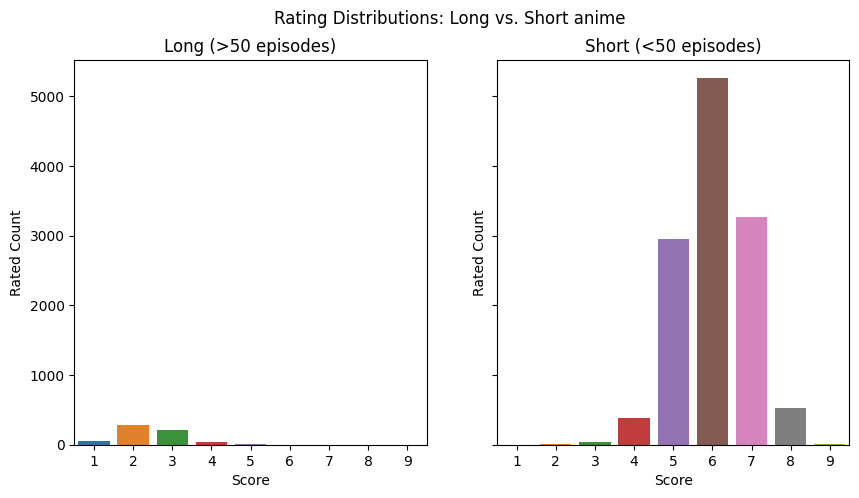

In [86]:
# Visualizing the distribution of ratings comparing long to short anime - An anime is considered long within the dataset if it has
# more than 100 episodes. 
filtered_data_2 = data[['score', 'episodes']].dropna()
filtered_data_2['score'] = filtered_data_2['score'].astype(int)
long_anime = filtered_data_2[filtered_data_2['episodes'] >= 50]
short_anime = filtered_data_2[filtered_data_2['episodes'] < 50]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Rating Distributions: Long vs. Short anime')

sns.countplot(ax=axes[0], x='score', data = long_anime)
axes[0].set_title('Long (>50 episodes)')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Rated Count')


sns.countplot(ax=axes[1], x='score', data = short_anime)
axes[1].set_title('Short (<50 episodes)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Rated Count')

plt.show()

# bar chart is visually appealing but for the left we cannot tell, (1,4,5)
# better representation pie chart? 




In [87]:
# Visualizing the top-rated anime in comparison to the number of episodes the show has. 
# filtered_df_2 = data[['title', 'start_year', 'score', 'episodes']]
# filtered_df_2 = filtered_df_2[pd.to_numeric(filtered_df_2['episodes'], errors='coerce').notnull()]
# filtered_df_2['episodes'] = pd.to_numeric(filtered_df_2['episodes'])

# # Remove outliers above 750 episodes
# filtered_df_2 = filtered_df_2[filtered_df_2['episodes'] <= 750]

# # Sort the DataFrame by score in descending order
# filtered_df_2 = filtered_df_2.sort_values('score', ascending=False)

# # Plot the scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=filtered_df_2, x='score', y='episodes', s=100, alpha=0.7)
# plt.xlabel('Score')
# plt.ylabel('Number of Episodes')
# plt.title('Top-rated Anime vs. Number of Episodes')
# plt.grid(True)
# plt.show()

# Visualizing the top-rated anime in comparison to the number of episodes the show has.
filtered_df_2 = data[['title', 'start_year', 'score', 'episodes']]
filtered_df_2 = filtered_df_2[pd.to_numeric(filtered_df_2['episodes'], errors='coerce').notnull()]
filtered_df_2['episodes'] = pd.to_numeric(filtered_df_2['episodes'])

# Remove outliers above 750 episodes
filtered_df_2 = filtered_df_2[filtered_df_2['episodes'] <= 750]

# Sort the DataFrame by score in descending order
filtered_df_2 = filtered_df_2.sort_values('score', ascending=False)

# Create interactive scatter plot using Plotly
fig = px.scatter(filtered_df_2, x='score', y='episodes', title='Top-rated Anime vs. Number of Episodes',
                 opacity=0.5, hover_name='title')
fig.update_layout(
    xaxis_title='Score',
    yaxis_title='Number of Episodes',
    hovermode='closest',
    showlegend=False
)
fig.show()
# filter by anime in 2013? 
# if i filter wouldnt that i lead to a certain bias? 
# graph user can choose a year? some filtering thing


Text(0, 0.5, 'Number of Members')

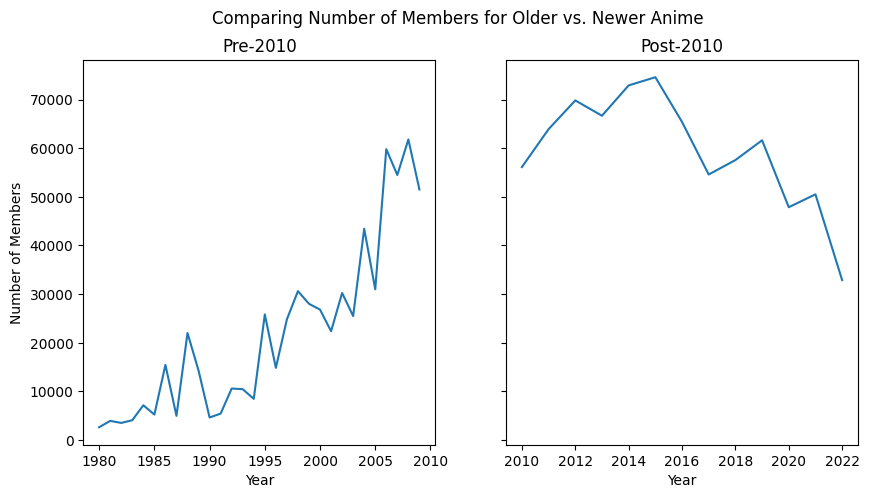

In [88]:
#Analyzing by Genre for pre-2016 and post-2016 showing the amount of members per year
filtered_data_3 = data[['start_year', 'members']]

pre_2010 = filtered_data_3[filtered_data_3['start_year'] < 2010]
post_2010 = filtered_data_3[(filtered_data_3['start_year'] >= 2010) & (filtered_data_3['start_year'] < 2023)]

data_by_year_pre_2010 = pre_2010.groupby('start_year')['members'].mean().reset_index(name='avg_members')
data_by_year_post_2010 = post_2010.groupby('start_year')['members'].mean().reset_index(name='avg_members')


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Comparing Number of Members for Older vs. Newer Anime')

sns.lineplot(ax=axes[0], data=data_by_year_pre_2010, x='start_year', y='avg_members')
axes[0].set_title('Pre-2010')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Members')

sns.lineplot(ax=axes[1], data=data_by_year_post_2010, x='start_year', y='avg_members')
axes[1].set_title('Post-2010')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Members')

# show different features, specific feature that shows viewer growth. strict coorelation between feature and amount of viewiers 
#different features impact amount of viewer

In [89]:
# # Visualizing the amount of members per year pre 2010
# sns.lineplot(data=data_by_year_pre_2010, x='start_year', y='avg_members')
# plt.xlabel('Start Year')
# plt.ylabel('Member')
# plt.title('Highest')
# plt.xticks(rotation=40, ha="right", fontsize=6)
# plt.savefig('line_plot_.png', bbox_inches='tight')
# plt.show()

# Visualizing the amount of members per year pre 2010
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_by_year_pre_2010['start_year'], y=data_by_year_pre_2010['avg_members'],
                    mode='lines',
                    name='Members'))
fig.update_layout(
    xaxis_title='Start Year',
    yaxis_title='Member',
    title='Highest',
    xaxis=dict(tickangle=40),
    showlegend=False
)
fig.show()

In [90]:
# # Visualizing the amount of members per year post 20160
# sns.lineplot(data=data_by_year_post_2010, x='start_year', y='avg_members')
# plt.xlabel('Start Year')
# plt.ylabel('Member')
# plt.title('Highest')
# plt.xticks(rotation=40, ha="right", fontsize=6)
# plt.savefig('line_plot_.png', bbox_inches='tight')
# plt.show()

# Visualizing the amount of members per year post 2010
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_by_year_post_2010['start_year'], y=data_by_year_post_2010['avg_members'],
                    mode='lines',
                    name='Members'))
fig.update_layout(
    xaxis_title='Start Year',
    yaxis_title='Member',
    title='Highest',
    xaxis=dict(tickangle=40),
    showlegend=False
)
fig.show()

In [91]:
def clean(x):
    x = x.strip('\'][\'').split('\', \'')
    return x

In [92]:
filtered_data_4 = data[['title', 'genres', 'members', 'start_year', 'score']].dropna()
filtered_data_4['genres'] = filtered_data_4['genres'].apply(clean)
data_from_80 = filtered_data_4[(filtered_data_4['start_year'] >= 1980) & (filtered_data_4['start_year'] < 1990)]
data_from_90 = filtered_data_4[(filtered_data_4['start_year'] >= 1990) & (filtered_data_4['start_year'] < 2000)]
data_from_00 = filtered_data_4[(filtered_data_4['start_year'] >= 2000) & (filtered_data_4['start_year'] < 2010)]
data_from_10 = filtered_data_4[(filtered_data_4['start_year'] >= 2010) & (filtered_data_4['start_year'] < 2020)]
data_from_20 = filtered_data_4[filtered_data_4['start_year'] >= 2020]

filtered_data_4


,title,genres,members,start_year,score
0,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",2932347,2009.0,9.13
1,Hunter x Hunter (2011),"[Action, Adventure, Fantasy]",2418883,2011.0,9.04
2,Shingeki no Kyojin Season 3 Part 2,"[Action, Drama]",1881734,2019.0,9.07
3,Steins;Gate,"[Drama, Sci-Fi, Suspense]",2269121,2011.0,9.08
4,Koe no Katachi,[Drama],2001335,2016.0,8.95
...,...,...,...,...,...
14266,Fin-tan to Sauna ni Nyuurou,[Slice of Life],284,2018.0,5.03
14267,Sigh,[],211,2014.0,5.08
14268,Love,[],230,2015.0,4.90
14269,Hakodate Musical,[],230,2016.0,4.94


In [107]:
# def create_genre_df(x):
#     #x['genres'] = x['genres'].apply(clean)
#     exploded_data = x.explode('genres')
#     member_group = exploded_data.groupby('genres')['members'].apply(sum)
#     member_dict = member_group.to_dict()
#     if '' in member_dict.keys():
#         member_dict.pop('')
#     score_group = exploded_data.groupby('genres')['score'].mean()
#     score_dict = score_group.to_dict()
#     if '' in score_dict.keys():
#         score_dict.pop('')
#     title_group = exploded_data.groupby('genres')['title'].apply(list)
#     title_dict = title_group.to_dict()
#     if '' in title_dict.keys():
#         title_dict.pop('')
    
#     # Calculate start_year values for each genre
#     start_year_group = exploded_data.groupby('genres')['start_year'].apply(list)
#     start_year_dict = start_year_group.to_dict()
#     if '' in start_year_dict.keys():
#         start_year_dict.pop('')
    
#     genre_df = pd.DataFrame(member_dict.items(), columns=['genres', 'members'])
#     genre_df.insert(2, 'score', score_dict.values(), True)
#     genre_df.insert(3, 'titles', title_dict.values(), True)
    
#     # Add start_year column to the dataframe
#     genre_df.insert(4, 'start_year', start_year_dict.values(), True)
    
#     genre_df.score = genre_df.score.round(2)
#     if (genre_df.loc[3]['genres']) == 'Award Winning':
#         genre_df = genre_df.drop(index=3)
#         genre_df = genre_df.reset_index()
#         genre_df = genre_df.drop('index', axis=1)
#     return genre_df

def create_genre_df(x):
    #x['genres'] = x['genres'].apply(clean)
    exploded_data = x.explode('genres')
    member_group = exploded_data.groupby('genres')['members'].apply(sum)
    member_dict = member_group.to_dict()
    if '' in member_dict.keys():
        member_dict.pop('')
    score_group = exploded_data.groupby('genres')['score'].mean()
    score_dict = score_group.to_dict()
    if '' in score_dict.keys():
        score_dict.pop('')
    title_group = exploded_data.groupby('genres')['title'].apply(list)
    title_dict = title_group.to_dict()
    if '' in title_dict.keys():
        title_dict.pop('')
    
    # Calculate start_year values for each genre
    start_year_group = exploded_data.groupby('genres')['start_year'].apply(list)
    start_year_dict = start_year_group.to_dict()
    if '' in start_year_dict.keys():
        start_year_dict.pop('')
    
    genre_df = pd.DataFrame(member_dict.items(), columns=['genres', 'members'])
    genre_df.insert(2, 'score', score_dict.values(), True)
    genre_df.insert(3, 'titles', title_dict.values(), True)
    
    # Add start_year column to the dataframe
    genre_df.insert(4, 'start_year', start_year_dict.values(), True)
    
    genre_df.score = genre_df.score.round(2)
    if (genre_df.loc[3]['genres']) == 'Award Winning':
        genre_df = genre_df.drop(index=3)
        genre_df = genre_df.reset_index()
        genre_df = genre_df.drop('index', axis=1)
    return genre_df


In [78]:
# genre_df = create_genre_df(filtered_data_4)
# genre_df_from_80 = create_genre_df(data_from_80)
# genre_df_from_90 = create_genre_df(data_from_90)
# genre_df_from_00 = create_genre_df(data_from_00)
# genre_df_from_10 = create_genre_df(data_from_10)
# genre_df_from_20 = create_genre_df(data_from_20)

# genre_df
genre_df = create_genre_df(filtered_data_4)
genre_df_from_80 = create_genre_df(data_from_80)
genre_df_from_90 = create_genre_df(data_from_90)
genre_df_from_00 = create_genre_df(data_from_00)
genre_df_from_10 = create_genre_df(data_from_10)
genre_df_from_20 = create_genre_df(data_from_20)

genre_df



,genres,members,score,titles,start_year
0,Action,362856105,6.76,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2019.0, 2008.0, 2021.0, 2006...."
1,Adventure,169474384,6.78,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2001.0, 1999.0, 2004.0, 2007...."
2,Avant Garde,8123867,5.69,[Neon Genesis Evangelion: The End of Evangelio...,"[1997.0, 1995.0, 1998.0, 2000.0, 1998.0, 2006...."
3,Boys Love,6159402,6.53,"[Given, Doukyuusei (Movie), Given Movie, Sekai...","[2019.0, 2016.0, 2020.0, 2011.0, 2022.0, 2008...."
4,Comedy,299925387,6.66,"[Mob Psycho 100 II, One Punch Man, Tengen Topp...","[2019.0, 2015.0, 2007.0, 2020.0, 2016.0, 2022...."
5,Drama,213294479,6.97,"[Fullmetal Alchemist: Brotherhood, Shingeki no...","[2009.0, 2019.0, 2011.0, 2016.0, 2016.0, 2008...."
6,Ecchi,80578091,6.48,[Mushoku Tensei: Isekai Ittara Honki Dasu Part...,"[2021.0, 2021.0, 2015.0, 2014.0, 2016.0, 2013...."
7,Erotica,775126,6.38,[Saezuru Tori wa Habatakanai: The Clouds Gathe...,"[2020.0, 2007.0, 2010.0, 1992.0, 2009.0, 2007...."
8,Fantasy,252037935,6.69,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2020.0, 1999.0, 2019.0, 2018...."
9,Girls Love,6234649,6.66,"[Yagate Kimi ni Naru, Yuru Yuri♪♪, Yuru Yuri, ...","[2018.0, 2012.0, 2011.0, 2015.0, 2015.0, 2018...."


In [58]:
# genre_database = [genre_df_from_80, genre_df_from_90, genre_df_from_00, genre_df_from_10, genre_df_from_20]
# new_genre_database = []
# for db in genre_database:
#     total_mem = db['members'].sum()
#     db = db[(db['genres'] == 'Action') |
#             (db['genres'] == 'Adventure') |
#             (db['genres'] == 'Comedy') |
#             (db['genres'] == 'Drama') |
#             (db['genres'] == 'Fanasty') |
#             (db['genres'] == 'Romance') |
#             (db['genres'] == 'Sci-Fi') |
#             (db['genres'] == 'Supernatural') |
#             (db['genres'] == 'Slice of Life')]
#     new_genre_database.append(db)
# # comment maybe about how we removed some genres, for presentation (less than 1%)

genre_database = [genre_df_from_80, genre_df_from_90, genre_df_from_00, genre_df_from_10, genre_df_from_20]
new_genre_database = []
for db in genre_database:
    total_mem = db['members'].sum()
    db = db[(db['genres'] == 'Action') |
            (db['genres'] == 'Adventure') |
            (db['genres'] == 'Comedy') |
            (db['genres'] == 'Drama') |
            (db['genres'] == 'Fanasty') |
            (db['genres'] == 'Romance') |
            (db['genres'] == 'Sci-Fi') |
            (db['genres'] == 'Supernatural') |
            (db['genres'] == 'Slice of Life')]
    new_genre_database.append(db)
# comment maybe about how we removed some genres, for presentation (less than 1%)



In [95]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=new_genre_database[0].genres, values=new_genre_database[0].members),
              1, 1)
fig.add_trace(go.Pie(labels=new_genre_database[1].genres, values=new_genre_database[1].members),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Viewers for Anime Genres from 1980-1999",
    annotations=[dict(text='1980\'s', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='1990\'s', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [96]:
# plot for actual 20
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=new_genre_database[2].genres, values=new_genre_database[2].members),
              1, 1)
fig.add_trace(go.Pie(labels=new_genre_database[3].genres, values=new_genre_database[3].members),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Viewers for Anime Genres from 2000-2019",
    annotations=[dict(text='2000\'s', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='2010\'s', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
filtered_data_5 = data[(data['start_year'] >= 2015) & (data['start_year'] < 2020)]

In [ ]:
filtered_data_5 = filtered_data_5.dropna()
filtered_data_5

In [271]:
genre_df_popular = create_genre_df(filtered_data_5)

In [272]:
genre_df_popular

,genres,members,score,titles,start_year
0,Action,129257221,6.85,"[Shingeki no Kyojin Season 3 Part 2, Shingeki ...","[2019.0, 2018.0, 2019.0, 2019.0, 2015.0, 2017...."
1,Adventure,48686467,6.88,"[Vinland Saga, Made in Abyss, JoJo no Kimyou n...","[2019.0, 2017.0, 2018.0, 2016.0, 2015.0, 2019...."
2,Avant Garde,1581470,5.62,"[Devilman: Crybaby, Boogiepop wa Warawanai (20...","[2018.0, 2019.0, 2019.0, 2018.0, 2018.0, 2019...."
3,Boys Love,1779434,6.80,"[Given, Doukyuusei (Movie), Junjou Romantica 3...","[2019.0, 2016.0, 2015.0, 2018.0, 2017.0, 2018...."
4,Comedy,99081004,6.64,"[Mob Psycho 100 II, One Punch Man, Mob Psycho ...","[2019.0, 2015.0, 2016.0, 2016.0, 2019.0, 2016...."
5,Drama,73073151,7.10,"[Shingeki no Kyojin Season 3 Part 2, Koe no Ka...","[2019.0, 2016.0, 2016.0, 2018.0, 2018.0, 2017...."
6,Ecchi,25848241,6.57,"[Shokugeki no Souma, Shokugeki no Souma: Ni no...","[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2015...."
7,Erotica,93079,6.21,[Yarichin☆Bitch-bu],[2018.0]
8,Fantasy,87088555,6.74,"[Kimetsu no Yaiba, Violet Evergarden, Made in ...","[2019.0, 2018.0, 2017.0, 2016.0, 2017.0, 2019...."
9,Girls Love,2693208,6.94,"[Yagate Kimi ni Naru, Yuru Yuri San☆Hai!, Yuru...","[2018.0, 2015.0, 2015.0, 2018.0, 2015.0, 2017...."


In [197]:
ratings = filtered_data_5[['score', 'synopsis']].dropna()
ratings['score'] = ratings['score'].round()
ratings = ratings.reset_index()
ratings = ratings.drop('index', axis=1)
labels = []
for i in ratings.score:
    if i > 7:
        labels.append('pos')
    else:
        labels.append('neg')
labels

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [198]:
enc = LabelEncoder()
labels = enc.fit_transform(labels)
text = ratings['synopsis']

def clean_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.replace('Written by MAL Rewrite', '')
    text = text.replace('\n', '')
    return text.translate(translator).lower()

processed = text.apply(clean_text)

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

processed


0       seek restor human diminish hope survey corp em...
1       wild youth elementari school student shouya is...
2       mitsuha miyamizu high school girl yearn live l...
3       still threaten titan rob freedom mankind remai...
4       ever sinc death father burden support famili f...
                              ...                        
3209    offici music video polari song graduat anim ta...
3210    enjoy finnish sauna experi fintan youtub 360° ...
3211    offici music video makura izumi song love also...
3212    wow inc first architectur project futur center...
3213    music web short asami ike made honor rookun al...
Name: synopsis, Length: 3214, dtype: object

In [199]:
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

word_features = [x[0] for x in all_words.most_common(1500)]

word_features

Number of words: 19110
Most common words: [('school', 846), ('girl', 808), ('one', 777), ('world', 730), ('new', 713), ('live', 566), ('anim', 550), ('day', 533), ('life', 520), ('howev', 517), ('friend', 511), ('find', 494), ('video', 469), ('student', 453), ('high', 449)]


['school',
 'girl',
 'one',
 'world',
 'new',
 'live',
 'anim',
 'day',
 'life',
 'howev',
 'friend',
 'find',
 'video',
 'student',
 'high',
 'year',
 'becom',
 'music',
 'take',
 'power',
 'time',
 'two',
 'human',
 'first',
 'game',
 'mysteri',
 'stori',
 'begin',
 'episod',
 'make',
 'name',
 'special',
 'love',
 'song',
 'use',
 'get',
 'work',
 'releas',
 'come',
 'must',
 'short',
 'group',
 'member',
 'meet',
 'way',
 'also',
 'follow',
 'young',
 'ann',
 'even',
 'includ',
 'togeth',
 'boy',
 'club',
 'offici',
 'battl',
 'help',
 'seri',
 'citi',
 'set',
 'famili',
 'team',
 'end',
 'peopl',
 'order',
 'fight',
 'go',
 'appear',
 'decid',
 'call',
 'back',
 'home',
 'dream',
 'idol',
 'forc',
 'like',
 'around',
 'season',
 'war',
 'charact',
 'tri',
 'continu',
 'start',
 'known',
 'man',
 'final',
 'place',
 'magic',
 'join',
 'learn',
 'three',
 'turn',
 'event',
 'face',
 'discov',
 'hope',
 'soon',
 'second',
 'father',
 'japan',
 'save',
 'manga',
 'chang',
 'futur',
 '

In [200]:
def find_features(message, word_features):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

features = find_features(processed[0], word_features)
for key, value in features.items():
    if value == True:
        print(key)

find
take
human
follow
even
battl
famili
back
home
season
discov
hope
encount
secret
strang
part
town
away
enemi
seek
mission
everyth
toward
path
alongsid
uncov
victori
stage
2
3
wall
embark
potenti
progress
restor
titan
gate
district
opposit
vow
maria


In [201]:
messages = list(zip(processed, labels))

np.random.seed(1)
np.random.shuffle(messages)

# Call find_features function for each SMS message
feature_set = [(find_features(text, word_features), labels) for (text, labels) in messages]

In [202]:
training, test = train_test_split(feature_set, test_size=0.25, random_state=1)

In [108]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SGD Classifier',
         'Naive Bayes', 'Support Vector Classifier']

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter=100),
    MultinomialNB(),
    SVC(kernel='linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, test)
    print("{} model Accuracy: {}".format(name, accuracy))

NameError: name 'training' is not defined

In [109]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression

# # Prepare the data for training the linear regression model
# X_train = genre_df['genres'].astype(str).str.lower().str.strip().to_frame()
# y_train = genre_df['members']

# # One-hot encode the genres
# encoded_genres = pd.get_dummies(X_train['genres'])
# X_train = pd.concat([X_train, encoded_genres], axis=1).drop('genres', axis=1)

# # Train the linear regression model
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Prepare the data for prediction (example: year 2010)
# X_predict_2010 = genre_df_from_10['genres'].astype(str).str.lower().str.strip().to_frame()
# encoded_genres_2010 = pd.get_dummies(X_predict_2010['genres'])
# X_predict_2010 = pd.concat([X_predict_2010, encoded_genres_2010], axis=1).drop('genres', axis=1)

# # Predict the members for 2010 using the trained regressor
# y_predict_2010 = regressor.predict(X_predict_2010)

# # Add the predicted members column to the prediction data for 2010
# predictions_2010 = genre_df_from_10.copy()
# predictions_2010['predicted_members'] = y_predict_2010

# # Print the predictions for the year 2010
# print("Predictions for 2010:")
# print(predictions_2010[['genres', 'predicted_members']])

# # Prepare the data for prediction (example: year 2020)
# X_predict_2020 = genre_df_from_20['genres'].astype(str).str.lower().str.strip().to_frame()
# encoded_genres_2020 = pd.get_dummies(X_predict_2020['genres'])
# X_predict_2020 = pd.concat([X_predict_2020, encoded_genres_2020], axis=1).drop('genres', axis=1)

# # Predict the members for 2020 using the trained regressor
# y_predict_2020 = regressor.predict(X_predict_2020)

# # Add the predicted members column to the prediction data for 2020
# predictions_2020 = genre_df_from_20.copy()
# predictions_2020['predicted_members'] = y_predict_2020

# # Print the predictions for the year 2020
# print("Predictions for 2020:")
# print(predictions_2020[['genres', 'predicted_members']])

import pandas as pd
from sklearn.linear_model import LinearRegression

# Prepare the data for training the linear regression model
X_train = genre_df['genres'].astype(str).str.lower().str.strip().to_frame()
y_train = genre_df['members']

# One-hot encode the genres
encoded_genres = pd.get_dummies(X_train['genres'])
X_train = pd.concat([X_train, encoded_genres], axis=1).drop('genres', axis=1)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prepare the data for prediction (example: year 2010)
X_predict_2010 = genre_df_from_10['genres'].astype(str).str.lower().str.strip().to_frame()
encoded_genres_2010 = pd.get_dummies(X_predict_2010['genres'])
X_predict_2010 = pd.concat([X_predict_2010, encoded_genres_2010], axis=1).drop('genres', axis=1)

# Predict the members for 2010 using the trained regressor
y_predict_2010 = regressor.predict(X_predict_2010)

# Add the predicted members column to the prediction data for 2010
predictions_2010 = genre_df_from_10.copy()
predictions_2010['predicted_members'] = y_predict_2010

# Print the predictions for the year 2010
print("Predictions for 2010:")
print(predictions_2010[['genres', 'predicted_members']])

# Prepare the data for prediction (example: year 2020)
X_predict_2020 = genre_df_from_20['genres'].astype(str).str.lower().str.strip().to_frame()
encoded_genres_2020 = pd.get_dummies(X_predict_2020['genres'])
X_predict_2020 = pd.concat([X_predict_2020, encoded_genres_2020], axis=1).drop('genres', axis=1)

# Predict the members for 2020 using the trained regressor
y_predict_2020 = regressor.predict(X_predict_2020)

# Add the predicted members column to the prediction data for 2020
predictions_2020 = genre_df_from_20.copy()
predictions_2020['predicted_members'] = y_predict_2020

# Print the predictions for the year 2020
print("Predictions for 2020:")
print(predictions_2020[['genres', 'predicted_members']])




Predictions for 2010:
           genres  predicted_members
0          Action        362856105.0
1       Adventure        169474384.0
2     Avant Garde          8123867.0
3       Boys Love          6159402.0
4          Comedy        299925387.0
5           Drama        213294479.0
6           Ecchi         80578091.0
7         Erotica           775126.0
8         Fantasy        252037935.0
9      Girls Love          6234649.0
10        Gourmet          8673811.0
11         Hentai          9765453.0
12         Horror         39500328.0
13        Mystery         80713170.0
14        Romance        205932278.0
15         Sci-Fi        128684906.0
16  Slice of Life         77683071.0
17         Sports         27494721.0
18   Supernatural        176013358.0
19       Suspense         37883573.0
Predictions for 2020:
           genres  predicted_members
0          Action        362856105.0
1       Adventure        169474384.0
2     Avant Garde          8123867.0
3       Boys Love          6159

In [97]:
# creating pie charts for amount of member per genre in 2010 and 2020 (actual)
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=new_genre_database[3].genres, values=new_genre_database[3].members),
              1, 1)
fig.add_trace(go.Pie(labels=new_genre_database[4].genres, values=new_genre_database[4].members),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Viewers for Anime Genres from 2010-2020",
    annotations=[dict(text='2010\'s', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='2020\'s', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [112]:
genre_database = [predictions_2010, 2020]
predicition_genre_database = []
for db in predicition_genre_database:
    total_mem = db['members'].sum()
    db = db[(db['genres'] == 'Action') |
            (db['genres'] == 'Adventure') |
            (db['genres'] == 'Comedy') |
            (db['genres'] == 'Drama') |
            (db['genres'] == 'Fanasty') |
            (db['genres'] == 'Romance') |
            (db['genres'] == 'Sci-Fi') |
            (db['genres'] == 'Supernatural') |
            (db['genres'] == 'Slice of Life')]
    predicition_genre_database.append(db)
    prediction_genre_database = []

In [117]:
predictions_2010.head()


,genres,members,score,titles,start_year,predicted_members
0,Action,37967435,6.95,"[Shingeki no Kyojin: The Final Season, Jujutsu...","[2021.0, 2020.0, 2020.0, 2022.0, 2022.0, 2022....",362856105.0
1,Adventure,18341421,6.98,"[Tensei shitara Slime Datta Ken 2nd Season, Ou...","[2021.0, 2021.0, 2021.0, 2021.0, 2021.0, 2020....",169474384.0
2,Avant Garde,160821,6.01,"[Puparia, Higurashi no Naku Koro ni Sotsu, Yam...","[2020.0, 2021.0, 2022.0, 2021.0, 2021.0, 2021....",8123867.0
3,Boys Love,839826,6.67,"[Given Movie, Sasaki to Miyano, Umibe no Étran...","[2020.0, 2022.0, 2020.0, 2021.0, 2020.0, 2020....",6159402.0
4,Comedy,30740970,6.82,[Kaguya-sama wa Kokurasetai? Tensai-tachi no R...,"[2020.0, 2022.0, 2022.0, 2021.0, 2020.0, 2021....",299925387.0


In [118]:
predictions_2020.head()

,genres,members,score,titles,start_year,predicted_members
0,Action,37967435,6.95,"[Shingeki no Kyojin: The Final Season, Jujutsu...","[2021.0, 2020.0, 2020.0, 2022.0, 2022.0, 2022....",362856105.0
1,Adventure,18341421,6.98,"[Tensei shitara Slime Datta Ken 2nd Season, Ou...","[2021.0, 2021.0, 2021.0, 2021.0, 2021.0, 2020....",169474384.0
2,Avant Garde,160821,6.01,"[Puparia, Higurashi no Naku Koro ni Sotsu, Yam...","[2020.0, 2021.0, 2022.0, 2021.0, 2021.0, 2021....",8123867.0
3,Boys Love,839826,6.67,"[Given Movie, Sasaki to Miyano, Umibe no Étran...","[2020.0, 2022.0, 2020.0, 2021.0, 2020.0, 2020....",6159402.0
4,Comedy,30740970,6.82,[Kaguya-sama wa Kokurasetai? Tensai-tachi no R...,"[2020.0, 2022.0, 2022.0, 2021.0, 2020.0, 2021....",299925387.0


In [116]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter genres based on desired ones
desired_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Supernatural', 'Slice of Life']
filtered_predictions_2010 = predictions_2010[predictions_2010['genres'].isin(desired_genres)]
filtered_predictions_2020 = predictions_2020[predictions_2020['genres'].isin(desired_genres)]

# Create the pie chart figure with two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add the pie chart for 2010 predictions
fig.add_trace(go.Pie(labels=filtered_predictions_2010['genres'], values=filtered_predictions_2010['predicted_members']),
              1, 1)

# Add the pie chart for 2020 predictions
fig.add_trace(go.Pie(labels=filtered_predictions_2020['genres'], values=filtered_predictions_2020['predicted_members']),
              1, 2)

# Update the chart layout
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Projected Viewers for Anime Genres in 2010 and 2020",
    annotations=[
        dict(text='2010', x=0.19, y=0.5, font_size=20, showarrow=False),
        dict(text='2020', x=0.82, y=0.5, font_size=20, showarrow=False)
    ]
)

# Display the chart
fig.show()




In [40]:
genre_df

,genres,members,score,titles,start_year
0,Action,362856105,6.76,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2019.0, 2008.0, 2021.0, 2006...."
1,Adventure,169474384,6.78,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2001.0, 1999.0, 2004.0, 2007...."
2,Avant Garde,8123867,5.69,[Neon Genesis Evangelion: The End of Evangelio...,"[1997.0, 1995.0, 1998.0, 2000.0, 1998.0, 2006...."
3,Award Winning,1724003,7.89,"[Sen to Chihiro no Kamikakushi, Tsumiki no Ie,...","[2001.0, 2008.0, 2021.0]"
4,Boys Love,6159402,6.53,"[Given, Doukyuusei (Movie), Given Movie, Sekai...","[2019.0, 2016.0, 2020.0, 2011.0, 2022.0, 2008...."
5,Comedy,299925387,6.66,"[Mob Psycho 100 II, One Punch Man, Tengen Topp...","[2019.0, 2015.0, 2007.0, 2020.0, 2016.0, 2022...."
6,Drama,213294479,6.97,"[Fullmetal Alchemist: Brotherhood, Shingeki no...","[2009.0, 2019.0, 2011.0, 2016.0, 2016.0, 2008...."
7,Ecchi,80578091,6.48,[Mushoku Tensei: Isekai Ittara Honki Dasu Part...,"[2021.0, 2021.0, 2015.0, 2014.0, 2016.0, 2013...."
8,Erotica,775126,6.38,[Saezuru Tori wa Habatakanai: The Clouds Gathe...,"[2020.0, 2007.0, 2010.0, 1992.0, 2009.0, 2007...."
9,Fantasy,252037935,6.69,"[Fullmetal Alchemist: Brotherhood, Hunter x Hu...","[2009.0, 2011.0, 2020.0, 1999.0, 2019.0, 2018...."


In [110]:
# Prepare the data for prediction (example: year 2024)
genres_2024 = ['Action', 'Adventure', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Slice of Life', 'Comedy'] 
X_predict_2024 = pd.DataFrame(genres_2024, columns=['genres'])

# Convert the genres to lowercase and strip whitespace
X_predict_2024['genres'] = X_predict_2024['genres'].astype(str).str.lower().str.strip()

# One-hot encode the genres for prediction
encoded_genres_2024 = pd.get_dummies(X_predict_2024['genres'])
X_predict_2024 = pd.concat([X_predict_2024, encoded_genres_2024], axis=1).drop('genres', axis=1)

# Ensure the order and number of columns in X_predict_2024 match the training data

# Predict the members for 2024 using the trained regressor
y_predict_2024 = regressor.predict(X_predict_2024)

# Add the predicted members column to the prediction data for 2024
predictions_2024 = pd.DataFrame(genres_2024, columns=['genres'])
predictions_2024['predicted_members'] = y_predict_2024

# Print the predictions for the year 2024
print("Predictions for 2024:")
print(predictions_2024[['genres', 'predicted_members']])





ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- avant garde
- boys love
- ecchi
- erotica
- girls love
- ...
